# Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

Time of purchase patterns (making sure last-minute purchases are expensive)

Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

# Importing necessary Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("Flight price Dataset.csv")
df

Unnamed: 0       Airline     Source Destination Dep_Time Arrival_Time  \
0             0       Vistara  New Delhi      Mumbai    13:25        18:45   
1             1       Vistara  New Delhi      Mumbai    06:30        18:45   
2             2        IndiGo  New Delhi      Mumbai    14:15        16:30   
3             3        IndiGo  New Delhi      Mumbai    16:25        18:40   
4             4        IndiGo  New Delhi      Mumbai    11:00        13:20   
..          ...           ...        ...         ...      ...          ...   
358         358        IndiGo  Bangalore       Kochi    07:15        08:20   
359         359        IndiGo  Bangalore       Kochi    13:10        14:20   
360         360  Alliance Air  Bangalore       Kochi    07:05        08:25   
361         361  Alliance Air  Bangalore       Kochi    18:30        19:50   
362         362        IndiGo  Bangalore       Kochi    05:20        06:35   

    Duration Total_Stops Additional_Info Price (in ₹)  
0     5h 20m      1 Stop       Free Meal        4,102  
1    12h 15m      1 Stop             NaN        4,102  
2     2h 15m    Non Stop       Free Meal        4,299  
3     2h 15m    Non Stop             NaN        4,299  
4     2h 20m    Non Stop             NaN        4,299  
..       ...         ...             ...          ...  
358   1h 05m    Non Stop         No info        2,169  
359   1h 10m    Non Stop         No info        2,169  
360   1h 20m    Non Stop         No info        2,191  
361   1h 20m    Non Stop         No info        2,191  
362   1h 15m    Non Stop         No info        2,200  

[363 rows x 10 columns]

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1918 rows and 10 columns present in our dataframe. In the above cell we can see our dataset includes a target label "Price" column and the remaining feature columns can be used to determine or help in predicting the price of the flights for different places. Since price is a continous value it makes this to be a Regression problem!

# Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction.

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 363 Rows and 9 Columns in our dataframe


Airline     Source Destination Dep_Time Arrival_Time Duration Total_Stops  \
0   Vistara  New Delhi      Mumbai    13:25        18:45   5h 20m      1 Stop   
1   Vistara  New Delhi      Mumbai    06:30        18:45  12h 15m      1 Stop   
2    IndiGo  New Delhi      Mumbai    14:15        16:30   2h 15m    Non Stop   
3    IndiGo  New Delhi      Mumbai    16:25        18:40   2h 15m    Non Stop   
4    IndiGo  New Delhi      Mumbai    11:00        13:20   2h 20m    Non Stop   
5  SpiceJet  New Delhi      Mumbai    20:00        22:05   2h 05m    Non Stop   
6  Air Asia  New Delhi      Mumbai    04:55        10:50   5h 55m      1 Stop   
7  Go First  New Delhi      Mumbai    05:00        10:45   5h 45m      1 Stop   
8  SpiceJet  New Delhi   Bangalore    06:20        09:10   2h 50m    Non Stop   
9  Air Asia  New Delhi   Bangalore    07:10        12:10   5h 00m      1 Stop   

  Additional_Info Price (in ₹)  
0       Free Meal        4,102  
1             NaN        4,102  
2       Free Meal        4,299  
3             NaN        4,299  
4             NaN        4,299  
5             NaN        4,307  
6             NaN        4,517  
7             NaN        4,592  
8             NaN        5,041  
9             NaN        5,167

Column Description:

-Airline : This shows the list of all the Airline Names for which the data got scraped

-Source : Gives us the name of the source place where the flight journey began

-Destination : Shows us the name of the destination place where the flight journey ended

-Dep_Time : In this column we have the timings of every flight departure

-Arrival_Time : Here in this column we have the timings of every flight arrival

-Duration : We can see the total duration of a flight that it took to fly from the source to the destination

-Total_Stops : Lists the number of stops the flight is going to take to complete the entire journey

-Additional_Info : Provides us with any additional information like type of meal that the passenger is eligible for

-Price : Finally we have our label column that has the ticket prices for the aircraft journey

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price (in ₹)'],
      dtype='object')


In [7]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Source                       3
Total_Stops                  3
Additional_Info              3
Airline                      7
Destination                 16
Duration                    82
Arrival_Time               146
Dep_Time                   147
Price (in ₹)               147

With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns of our dataset.

In [8]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          363 non-null    object
 1   Source           363 non-null    object
 2   Destination      363 non-null    object
 3   Dep_Time         363 non-null    object
 4   Arrival_Time     363 non-null    object
 5   Duration         363 non-null    object
 6   Total_Stops      363 non-null    object
 7   Additional_Info  261 non-null    object
 8   Price (in ₹)     363 non-null    object
dtypes: object(9)
memory usage: 25.6+ KB


The above dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [9]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('-'*80)

IndiGo          132
Go First         60
Air Asia         57
Vistara          45
SpiceJet         35
Air India        25
Alliance Air      9
Name: Airline, dtype: int64
--------------------------------------------------------------------------------
Bangalore    150
New Delhi    128
Mumbai        85
Name: Source, dtype: int64
--------------------------------------------------------------------------------
Kochi         41
Ahmedabad     36
Goa           35
Pune          34
Hyderabad     33
Mumbai        32
Bangalore     32
Kolkata       24
New Delhi     21
Jaipur        14
Srinagar      13
Chennai       13
Guwahati      10
Patna          9
Varanasi       9
Chandigarh     7
Name: Destination, dtype: int64
--------------------------------------------------------------------------------
07:00    15
05:45    12
08:00     9
06:40     9
07:10     8
         ..
19:05     1
05:25     1
14:45     1
02:30     1
09:25     1
Name: Dep_Time, Length: 147, dtype: int64
---------------------------------

Column 'Additional_info' having data related to meal availibility, so let's rename this column.

In [10]:
df.rename(columns = {"Additional_Info": "Meal_Availability"},inplace = True)

In [11]:
df.rename(columns={df.columns[8]:'Price'}, inplace=True) #Renaming the Price column to remove the Rupees symbol

In [12]:
# Checking for null values
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Meal_Availability    102
Price                  0
dtype: int64

We can see some null values on 'Meal_Availability' column, let's fill the null values with mode method as this is a catagorical column.

In [13]:
df["Meal_Availability"] = df["Meal_Availability"].fillna(df["Meal_Availability"].mode()[0])

In [14]:
# Checking for null values after imputing
df.isnull().sum()

Airline              0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Meal_Availability    0
Price                0
dtype: int64

<AxesSubplot:>

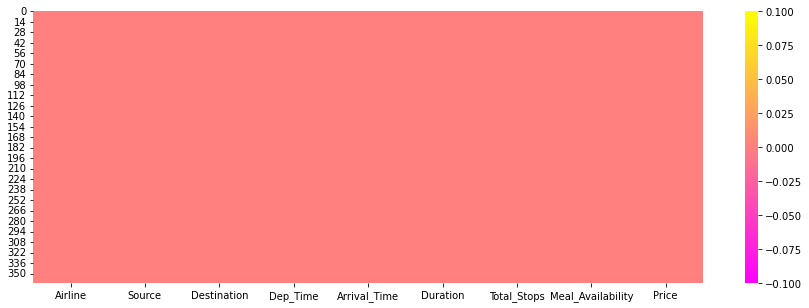

In [15]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="spring")

# Total_Stops

In [16]:
# Total_Stops

df.Total_Stops.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2}, 
                           inplace = True)
df["Total_Stops"].value_counts()

0    263
1     99
2      1
Name: Total_Stops, dtype: int64

Now we are changing the object datatype "Total_Stops" column to integer values by giving them the numeric stops values instead of a descriptive one.

In [17]:
# Converting columns from object type to Datetime Type
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

# Duration

In [18]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

# Departure_time
Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [19]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
df["Departure_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [20]:
# Dropping Departure_time column
df.drop("Dep_Time",axis=1,inplace=True)

# Arrival_Time
Similarly we can extract hours and minutes from Arrival_Time column and dropping Arrival_Time column.

In [21]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time column
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

# Price
The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [22]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [23]:
# Checking dataset again
df

Airline     Source Destination   Duration  Total_Stops  \
0         Vistara  New Delhi      Mumbai   5.333333            1   
1         Vistara  New Delhi      Mumbai  12.250000            1   
2          IndiGo  New Delhi      Mumbai   2.250000            0   
3          IndiGo  New Delhi      Mumbai   2.250000            0   
4          IndiGo  New Delhi      Mumbai   2.333333            0   
..            ...        ...         ...        ...          ...   
358        IndiGo  Bangalore       Kochi   1.083333            0   
359        IndiGo  Bangalore       Kochi   1.166667            0   
360  Alliance Air  Bangalore       Kochi   1.333333            0   
361  Alliance Air  Bangalore       Kochi   1.333333            0   
362        IndiGo  Bangalore       Kochi   1.250000            0   

    Meal_Availability   Price  Departure_Hour  Departure_Min  Arrival_Hour  \
0           Free Meal  4102.0              13             25            18   
1             No info  4102.0               6             30            18   
2           Free Meal  4299.0              14             15            16   
3             No info  4299.0              16             25            18   
4             No info  4299.0              11              0            13   
..                ...     ...             ...            ...           ...   
358           No info  2169.0               7             15             8   
359           No info  2169.0              13             10            14   
360           No info  2191.0               7              5             8   
361           No info  2191.0              18             30            19   
362           No info  2200.0               5             20             6   

     Arrival_Min  
0             45  
1             45  
2             30  
3             40  
4             20  
..           ...  
358           20  
359           20  
360           25  
361           50  
362           35  

[363 rows x 11 columns]

In [24]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Source                object
Destination           object
Duration             float64
Total_Stops            int64
Meal_Availability     object
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

In [25]:
# Statistical summary of dataset
df.describe()

Duration  Total_Stops        Price  Departure_Hour  Departure_Min  \
count  363.000000   363.000000   363.000000      363.000000     363.000000   
mean     3.595960     0.278237  4244.652893       11.035813      24.944904   
std      3.331545     0.454863  1551.051312        5.804488      17.632599   
min      1.000000     0.000000  1840.000000        0.000000       0.000000   
25%      1.500000     0.000000  2598.500000        6.000000      10.000000   
50%      2.166667     0.000000  4402.000000        9.000000      25.000000   
75%      5.000000     1.000000  5289.000000       16.000000      40.000000   
max     17.250000     2.000000  8228.000000       22.000000      55.000000   

       Arrival_Hour  Arrival_Min  
count    363.000000   363.000000  
mean      14.581267    27.975207  
std        5.777732    17.466367  
min        1.000000     0.000000  
25%        9.000000    15.000000  
50%       15.000000    25.000000  
75%       20.000000    45.000000  
max       23.000000    55.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

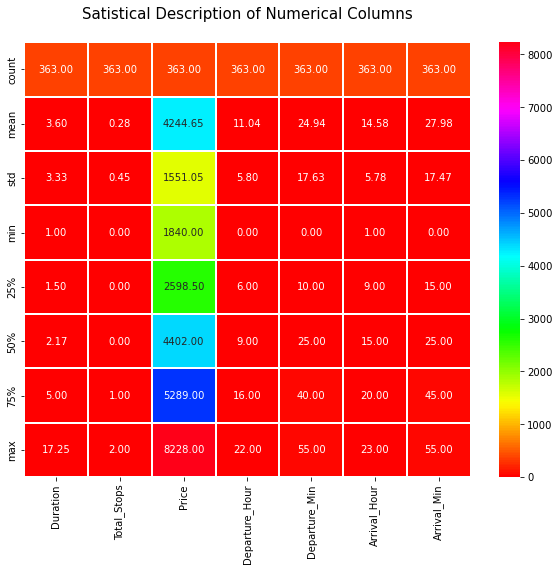

In [26]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hsv")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

In [27]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_Availability']

Numerical columns present in the dataset are:
 ['Duration', 'Total_Stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization

In [28]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=718c996a9ffedad82e56a9ad992b879c39bb934c6e68335b084791e0c77e5a14
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [29]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

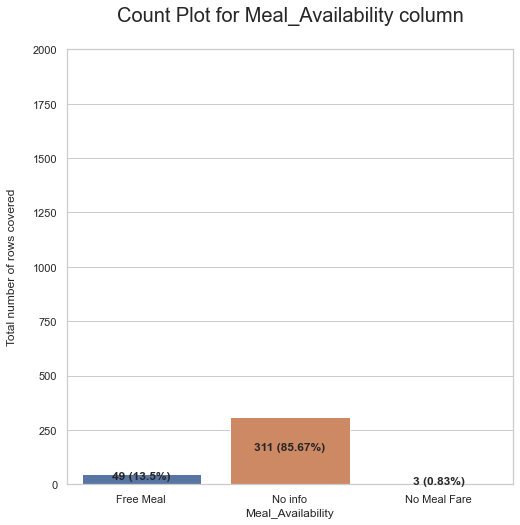

In [30]:
sns.set(style="whitegrid")

try:
    x = 'Meal_Availability'
    k=0
    plt.figure(figsize=[8,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From above plot we can see 82.8% cases there is no info of meal, so we can say free meal will not be provided.

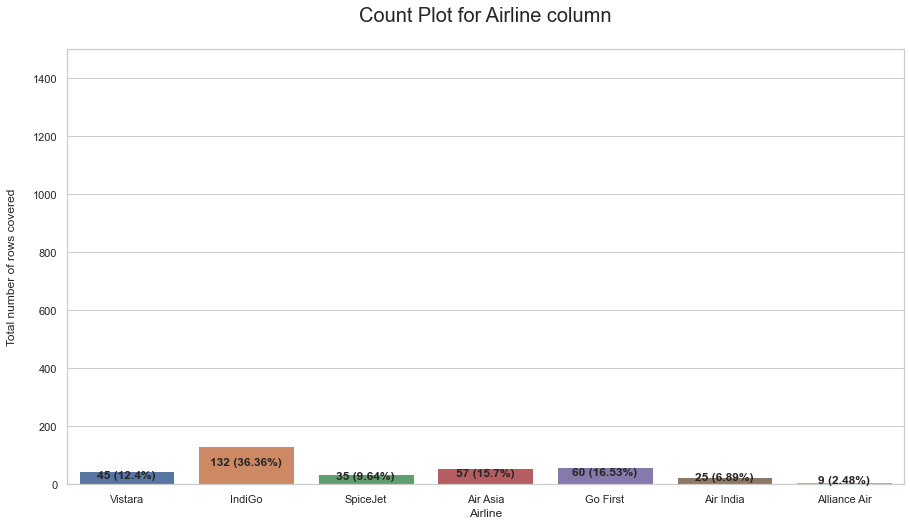

In [31]:
try:
    x = 'Airline'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,1500)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Highest number of airline preferred by people are Indigo covering 45.7% of the total record. Air Asia, Go First and Vistara and similar in range. Alliance Air has the lowest numbers.

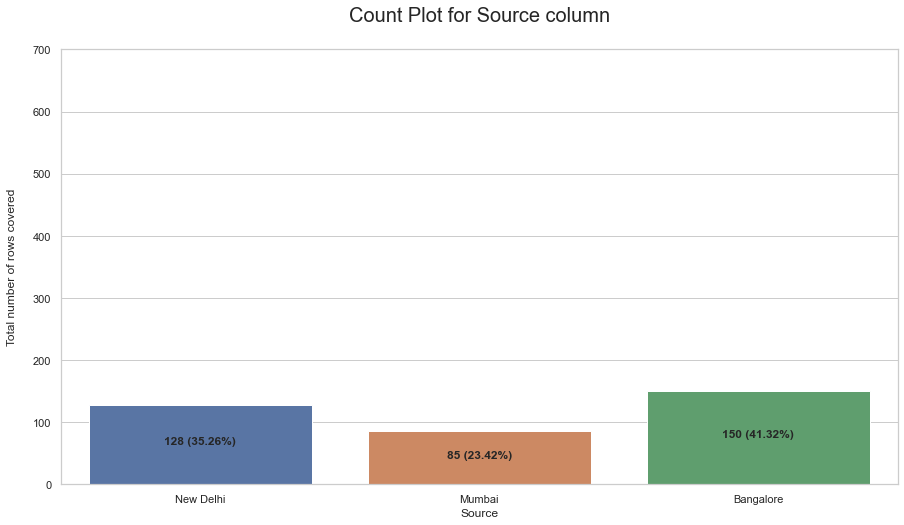

In [32]:
try:
    x = 'Source'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,700)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

The departure area or source place highly used or people majorly flying from the city is "New Delhi" covering 45.52% record in the column
We see that "Banglore" is a close second wherein it covers 21.85% records in the column
Other two famous locations where people chose to fly from are "Mumbai" and "Hyderabad"
The least travel from location is "Kolkata"

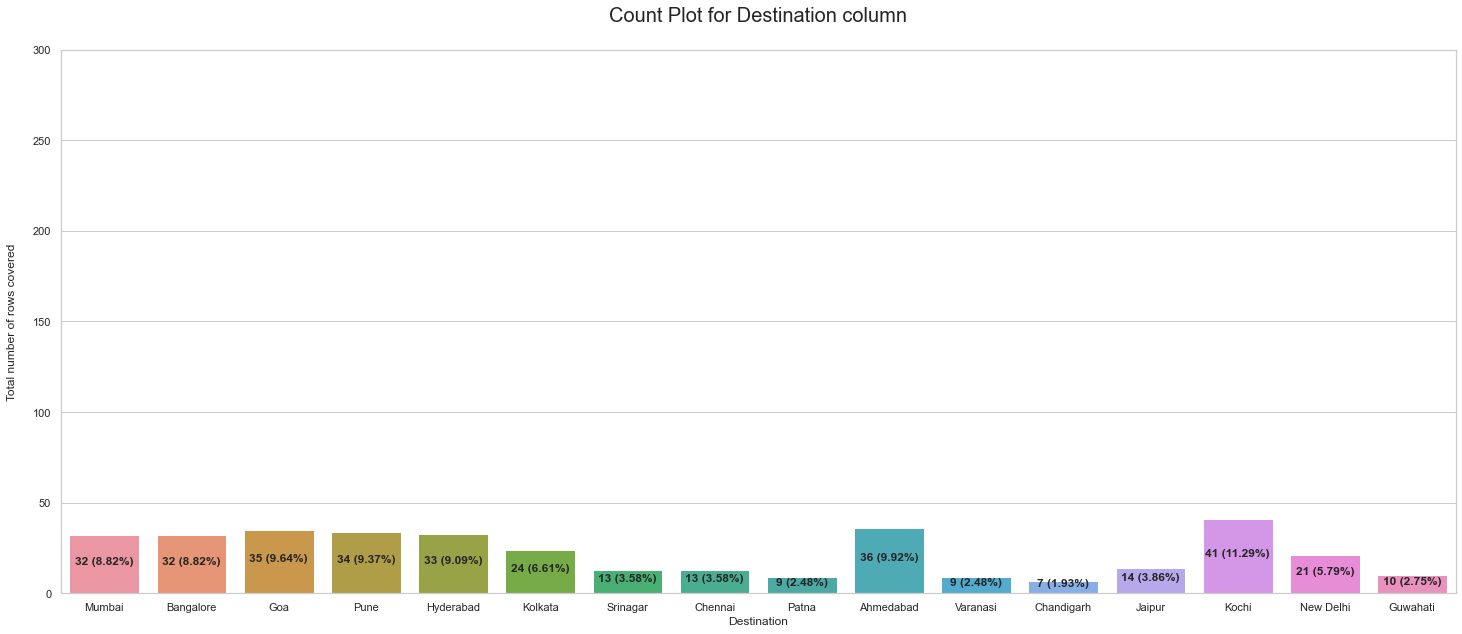

In [33]:
try:
    x = 'Destination'
    k=0
    plt.figure(figsize=[25,10])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,300)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Banglore and kolkata have the highest number of flights

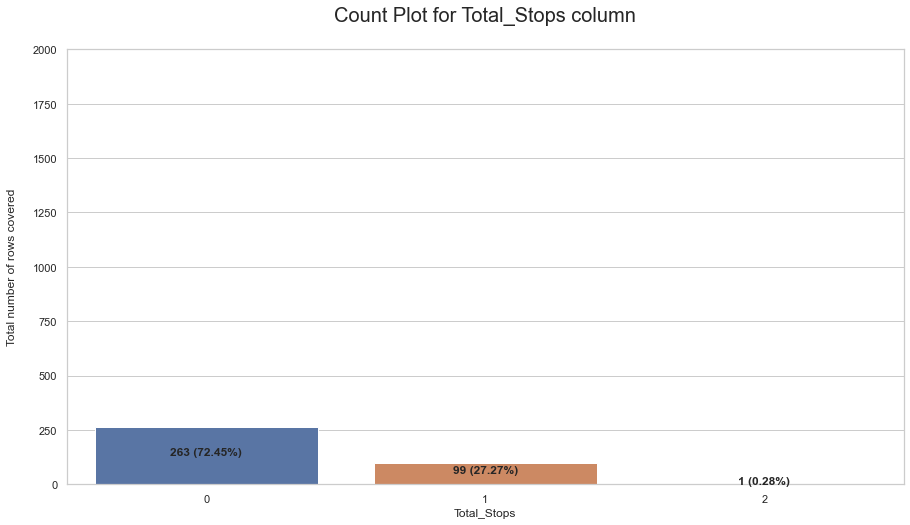

In [34]:
try:
    x = 'Total_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Majority of the cases, every one flies with direct flight and followed by 1 stop flight. No one prefers flight with more than 1 stop.

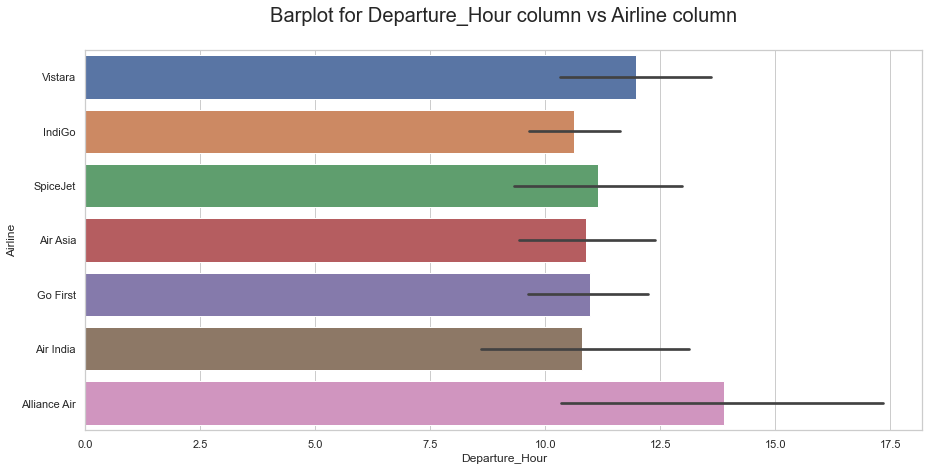

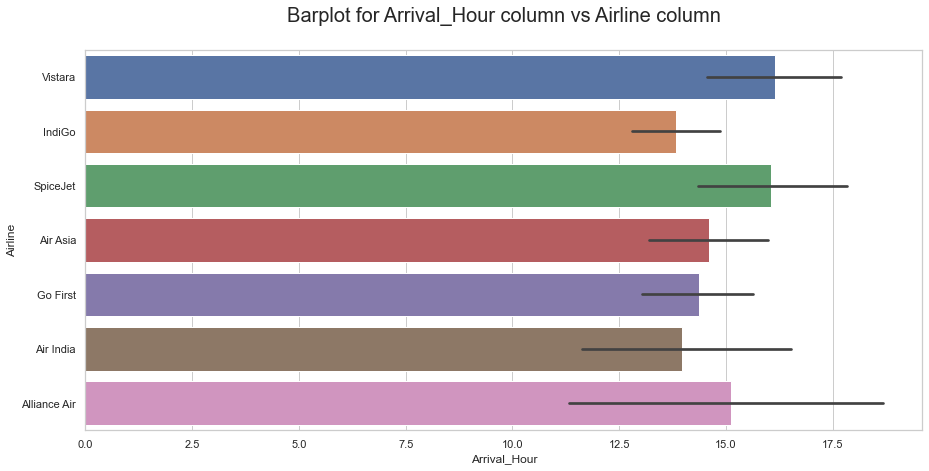

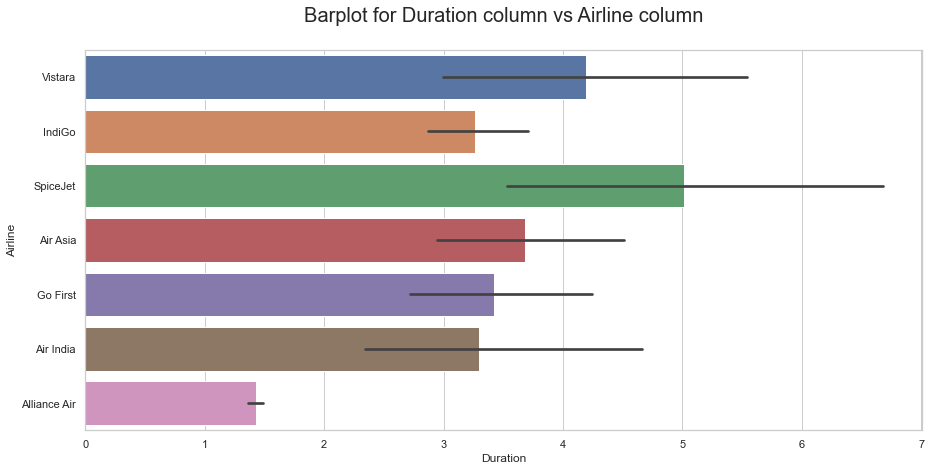

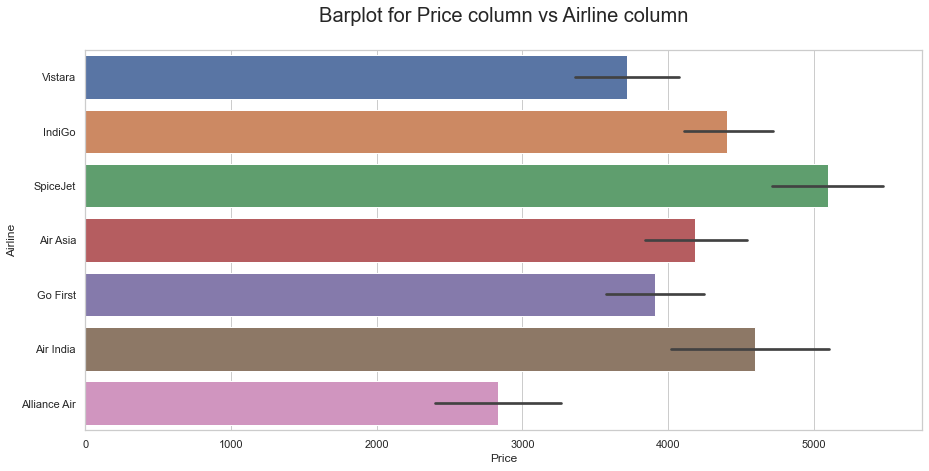

In [35]:
y = 'Airline'

x = 'Departure_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Arrival_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

When we observe the bar plot for Departure hour vs Airline we can see that Alliance Air has the highest departure time while Go First has the lowest departure time
 Considering the bar plot for Arrival time vs Airline we can see that Spicejet has the highest arrival time while Indigo have the lowest arrival time
 Looking at the bar plot for Flight duration vs Airline we observe that Spicejet has the highest flight duration while Alliance Air has the lowest flight duration collectively
 Comparing the bar plots for Flight prices vs Airline we can clearly see that Spicejet have very high flight prices while the Alliance Air has the lowest fare.

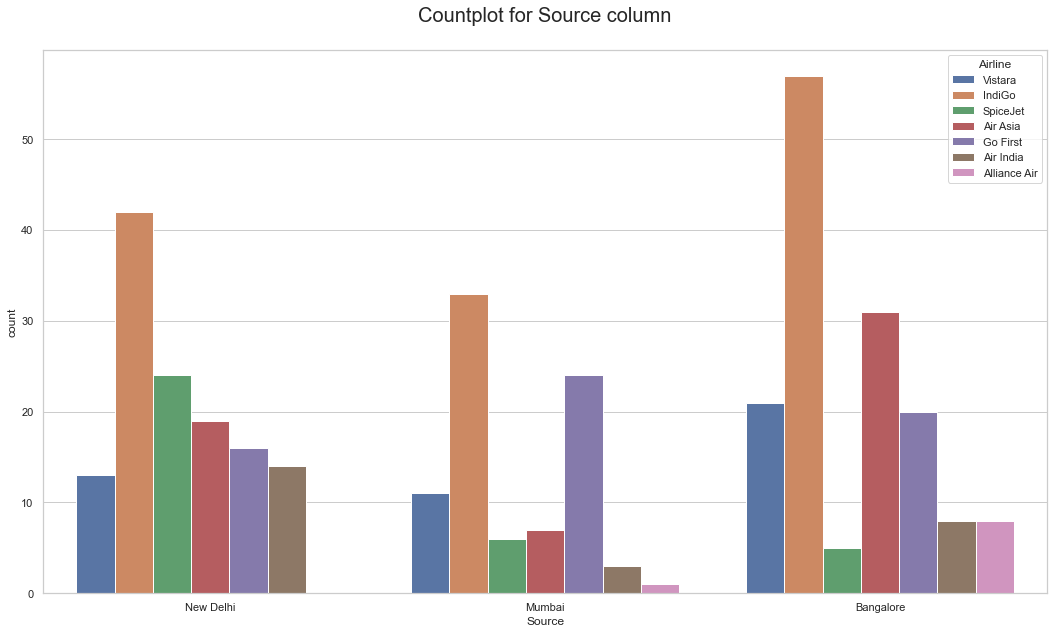

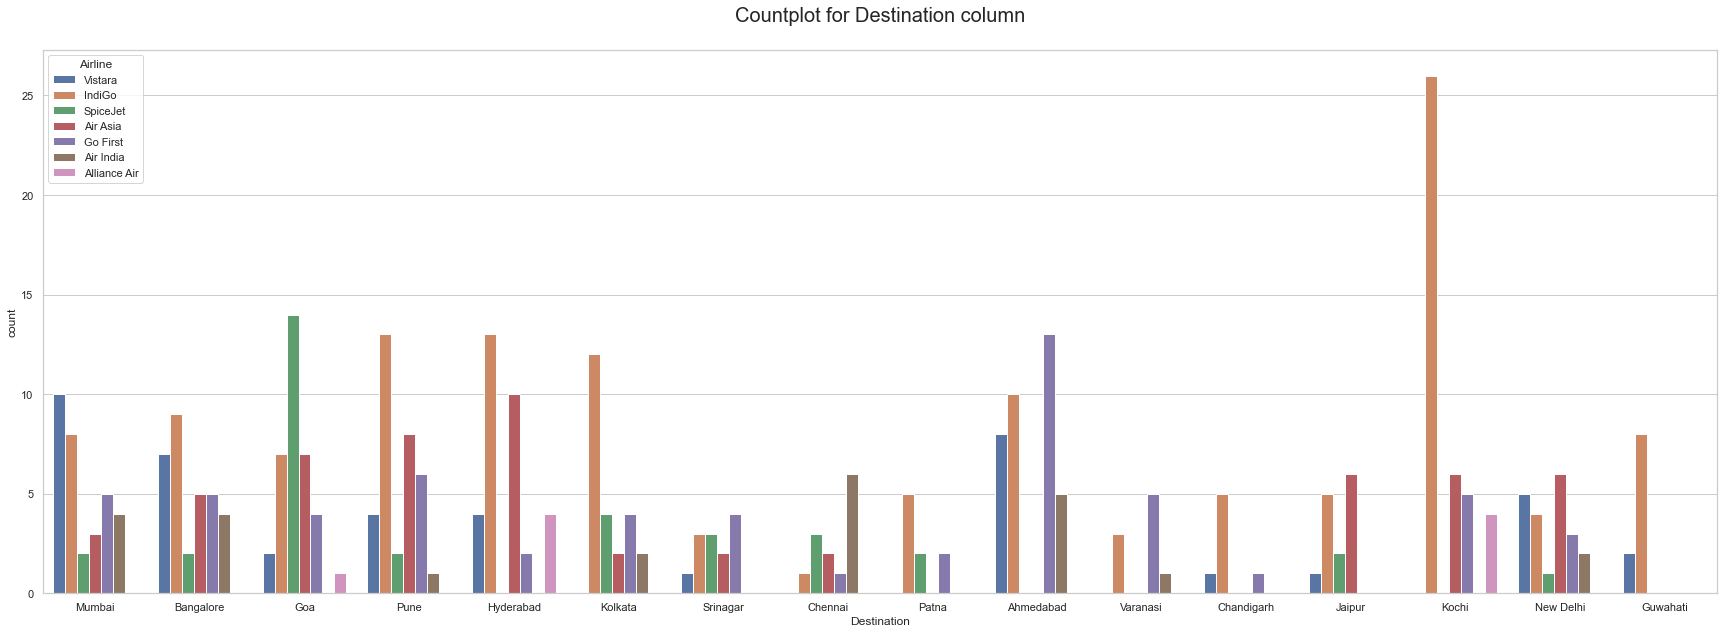

In [36]:
x = "Source"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize=(30,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Checking out the Source place details for each and every airline we can see that New Delhi has the highest number of departure flights for Indigo airlines

 Looking at the Destination place details for each airline we can see that Kolkata has the highest number of arrival flights for Indigo airlines

 Overall, I can notice that Indigo flights do quite well and can be used for arrival and departure to and from any location in India

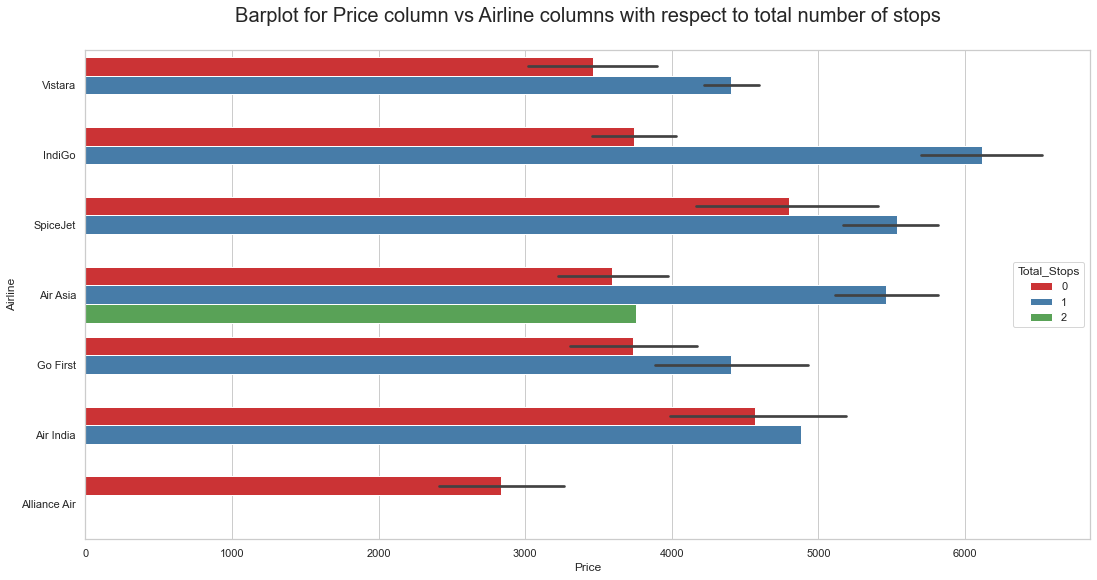

In [37]:
x = "Price"
y = "Airline"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Total_Stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

Spicejet has the maximum non stop flight

Air India has the maximum no of 1 stop flights

Air Asia has the maxiumum no of 2 stop flights 

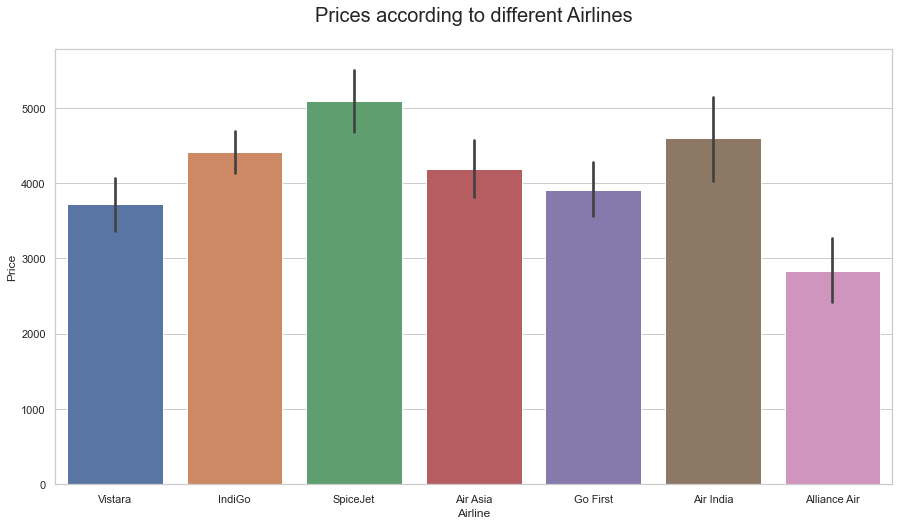

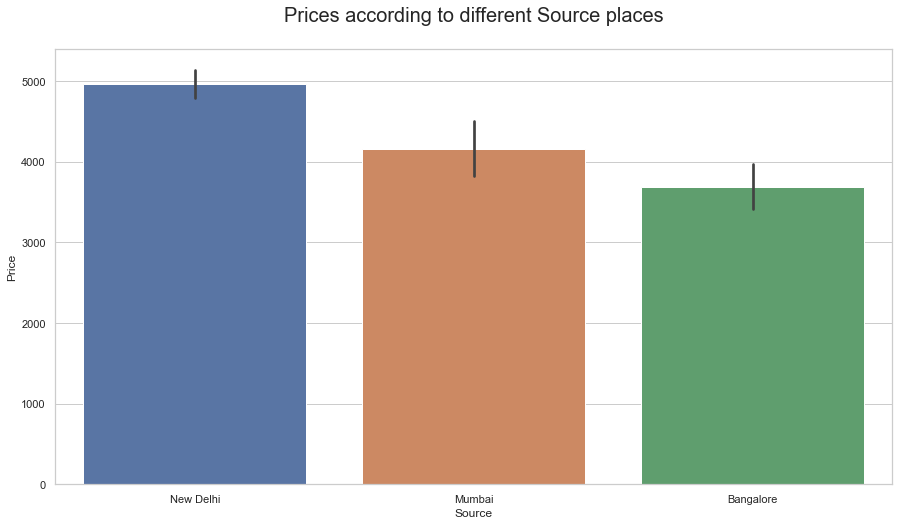

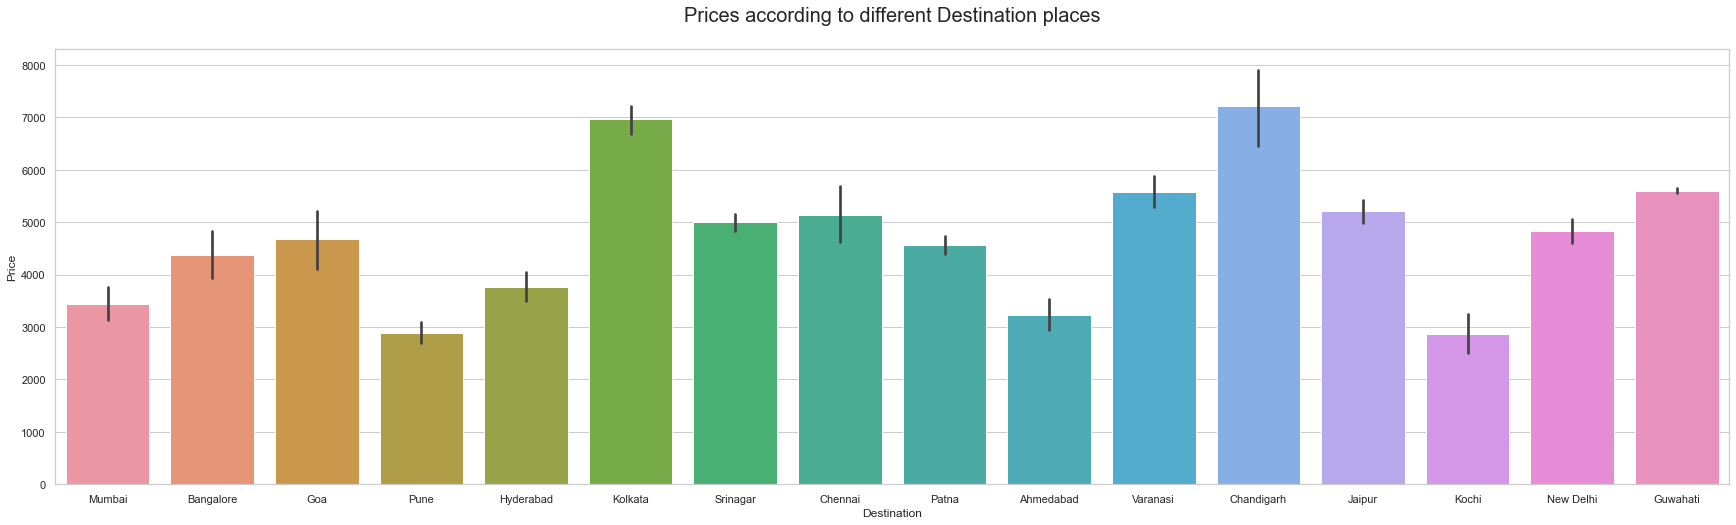

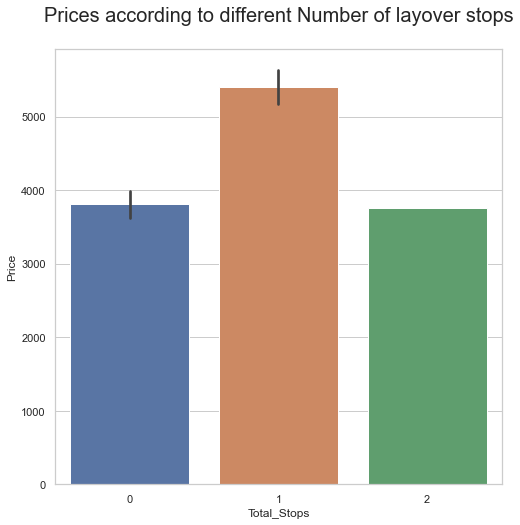

In [38]:
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize = (30,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

Airfares in SpiceJet and Air India are high when compared to other airlines.

 Flight prices when departing from cities like Kolkata and New Delhi have higher price range but the others are around the similar range a bit lesser in pricing but not providing a huge difference as such

 Similarly, prices when arriving in cities Chandigarh and Kolkata have high price range

 When we consider the layovers for pricing situation then obviously direct flights are cheaper when compared to flights that have 1 or more stops.

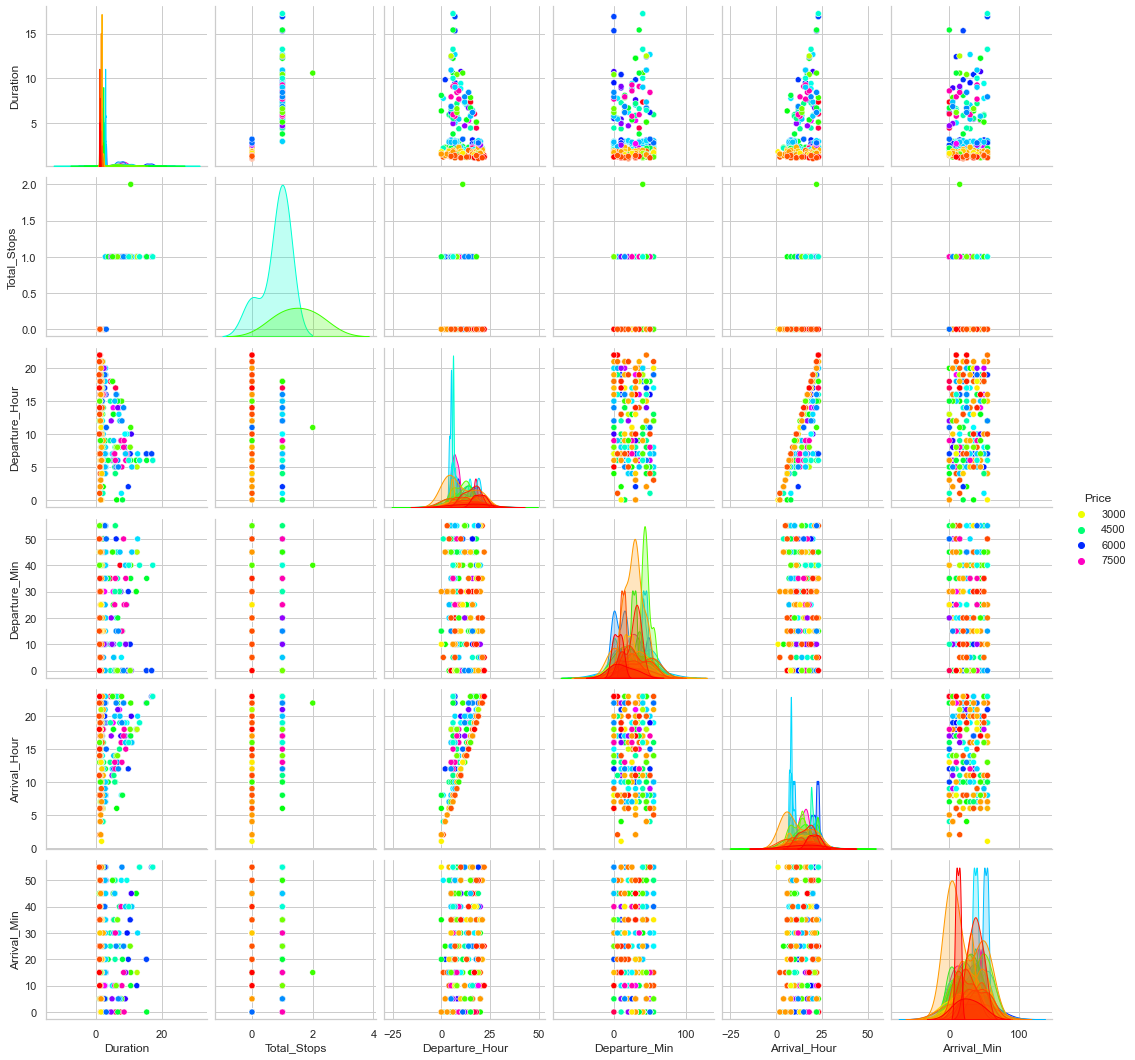

In [39]:
sns.pairplot(df,hue="Price",palette="hsv")
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.

Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

# Outliers

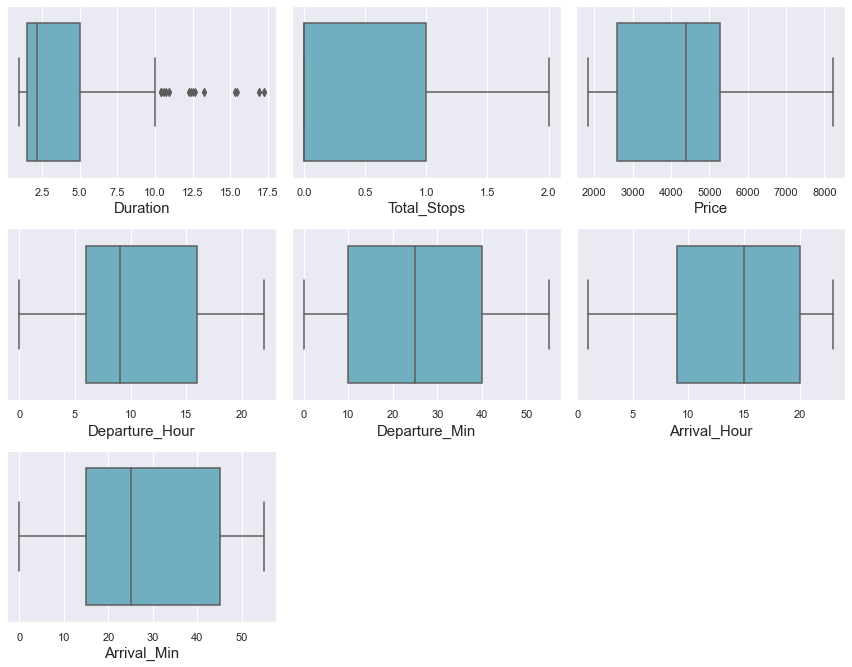

In [40]:
# Identifying the outliers using boxplot
sns.set(style="darkgrid")

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see that columns "Duration" have some outliers, let's remove the outliers through zscore method

We can ignore the outliers present in Price column as this is our target column

In [41]:
# Features containing outliers
df1= df[['Duration']]

In [42]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df1=df[(z<3).all(axis=1)]

In [43]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", df.shape)
print("Shape of train dataset after removing outliers:", new_df1.shape)

Shape of train dataset before removing outliers: (363, 11)
Shape of train dataset after removing outliers: (356, 11)


In [44]:
# Let's check the the data loss
data_loss = (1918-1892)/1918*100
data_loss

1.3555787278415017

Now we have removed the outliers.

In [45]:
df=new_df1.copy() # Reassigning the changed dataframe name to our original dataframe name

# Skewness

In [46]:
# Checking the skewness
df.skew()

Duration          1.624346
Total_Stops       1.169389
Price             0.243521
Departure_Hour    0.233135
Departure_Min     0.062802
Arrival_Hour     -0.129146
Arrival_Min      -0.023232
dtype: float64

We can find the skewness in Duration and Total_Stops column, Let's remove skewness of Duration column only

# Removing skewness using yeo-johnson method

In [47]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ['Duration']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [48]:
df[skew1] = scaler.fit_transform(df[skew1].values)
df[skew1].head()

Duration
0  1.184220
1  1.760529
2 -0.002704
3 -0.002704
4  0.061411

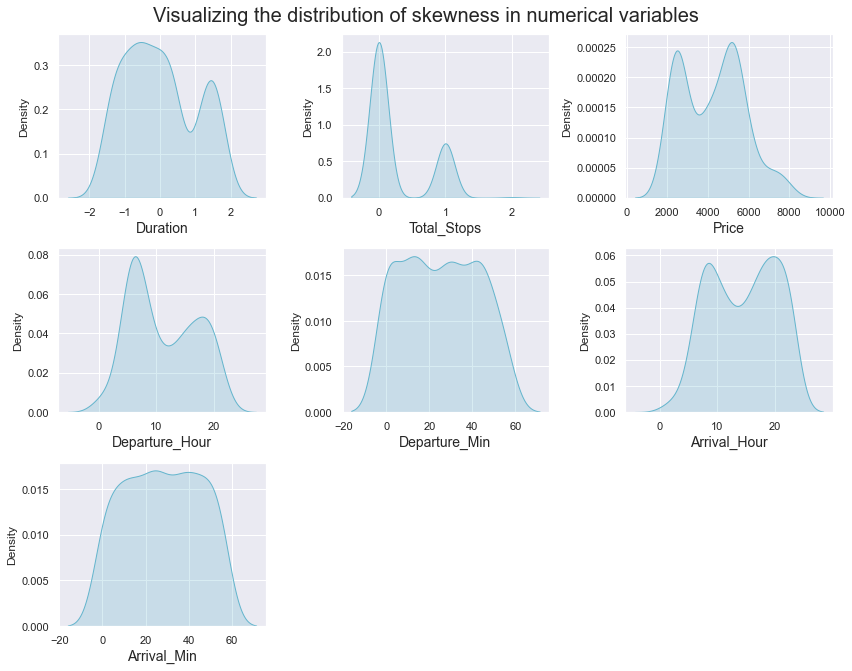

In [49]:
# Checking how the data has been distriubted 
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="c", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Encoding the categorical columns using Label Encoder Method

In [50]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [51]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

Airline  Source  Destination  Meal_Availability
0        6       2           10                  0
1        6       2           10                  2
2        4       2           10                  0
3        4       2           10                  2
4        4       2           10                  2

# Correlation

In [52]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Airline    Source  Destination  Duration  Total_Stops  \
Airline            1.000000  0.060728    -0.016227  0.023032    -0.012704   
Source             0.060728  1.000000    -0.179373  0.176226    -0.055237   
Destination       -0.016227 -0.179373     1.000000 -0.049124     0.021743   
Duration           0.023032  0.176226    -0.049124  1.000000     0.832404   
Total_Stops       -0.012704 -0.055237     0.021743  0.832404     1.000000   
Meal_Availability  0.003379 -0.045222     0.078317 -0.007493     0.005658   
Price             -0.000321  0.352084     0.000005  0.697797     0.437305   
Departure_Hour     0.041728 -0.081449    -0.013182 -0.248210    -0.237110   
Departure_Min     -0.083053 -0.039937     0.095216 -0.054065    -0.113034   
Arrival_Hour       0.031116 -0.095214    -0.014556  0.183847     0.192507   
Arrival_Min       -0.068601  0.022740    -0.114703 -0.002039    -0.030032   

                   Meal_Availability     Price  Departure_Hour  Departure_Min  \
Airline                     0.003379 -0.000321        0.041728      -0.083053   
Source                     -0.045222  0.352084       -0.081449      -0.039937   
Destination                 0.078317  0.000005       -0.013182       0.095216   
Duration                   -0.007493  0.697797       -0.248210      -0.054065   
Total_Stops                 0.005658  0.437305       -0.237110      -0.113034   
Meal_Availability           1.000000 -0.003421       -0.021309       0.048504   
Price                      -0.003421  1.000000       -0.108216       0.053625   
Departure_Hour             -0.021309 -0.108216        1.000000      -0.044730   
Departure_Min               0.048504  0.053625       -0.044730       1.000000   
Arrival_Hour               -0.021584  0.140363        0.878567      -0.009164   
Arrival_Min                -0.104789 -0.024790        0.046230      -0.089895   

                   Arrival_Hour  Arrival_Min  
Airline                0.031116    -0.068601  
Source                -0.095214     0.022740  
Destination           -0.014556    -0.114703  
Duration               0.183847    -0.002039  
Total_Stops            0.192507    -0.030032  
Meal_Availability     -0.021584    -0.104789  
Price                  0.140363    -0.024790  
Departure_Hour         0.878567     0.046230  
Departure_Min         -0.009164    -0.089895  
Arrival_Hour           1.000000     0.005765  
Arrival_Min            0.005765     1.000000

This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

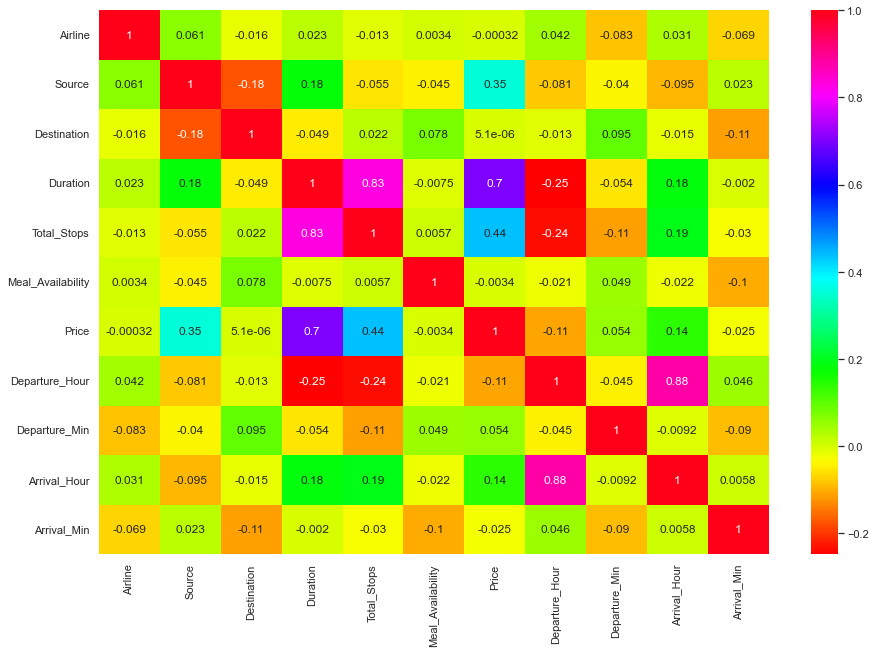

In [53]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='hsv',annot=True)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other

In [54]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Duration             0.697797
Total_Stops          0.437305
Source               0.352084
Arrival_Hour         0.140363
Departure_Min        0.053625
Destination          0.000005
Airline             -0.000321
Meal_Availability   -0.003421
Arrival_Min         -0.024790
Departure_Hour      -0.108216
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

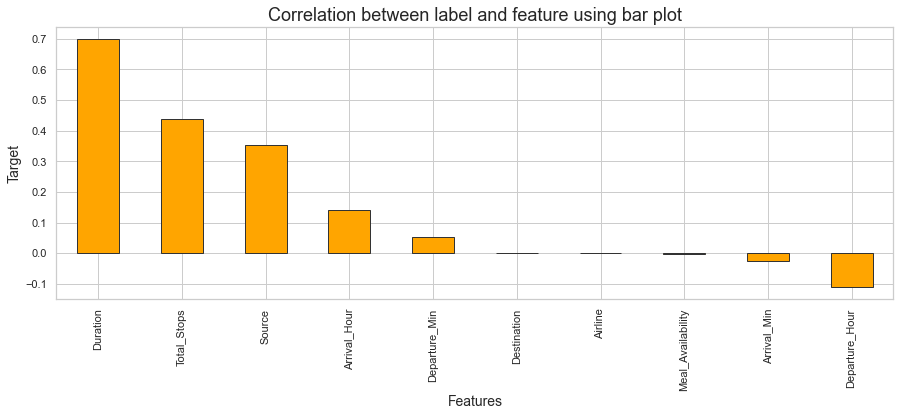

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='orange',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Arrival_Hour" has less correlation with the label compared to other features.

# Separating the independent and target variables into x and y

In [56]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [57]:
# Dimension of x and y
x.shape, y.shape

((356, 10), (356,))

# Scaling data with standard scaler

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Airline    Source  Destination  Duration  Total_Stops  Meal_Availability  \
0  1.476008  1.224813      0.66962  1.184220     1.645879          -2.540823   
1  1.476008  1.224813      0.66962  1.760529     1.645879           0.400748   
2  0.401450  1.224813      0.66962 -0.002704    -0.590506          -2.540823   
3  0.401450  1.224813      0.66962 -0.002704    -0.590506           0.400748   
4  0.401450  1.224813      0.66962  0.061411    -0.590506           0.400748   

   Departure_Hour  Departure_Min  Arrival_Hour  Arrival_Min  
0        0.322487      -0.006407      0.625706     0.994294  
1       -0.880562       0.278693      0.625706     0.994294  
2        0.494351      -0.576606      0.275743     0.127432  
3        0.838079      -0.006407      0.625706     0.705340  
4       -0.021242      -1.431906     -0.249201    -0.450476

# Modeling

Finding the Best Random State and Accuracy

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9525383714035728  on Random_state  40


Here we are getting accuracy score of 93% with Random state 123

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Feature Importance

In [62]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                     
Duration                0.566
Destination             0.282
Source                  0.061
Arrival_Hour            0.023
Airline                 0.020
Departure_Hour          0.018
Arrival_Min             0.017
Departure_Min           0.010
Meal_Availability       0.002
Total_Stops             0.001

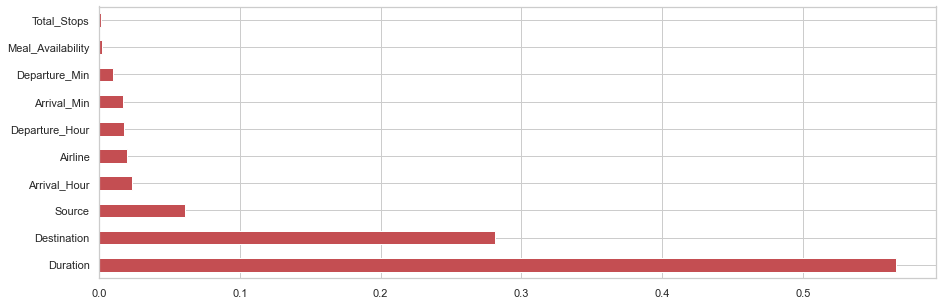

In [63]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="r")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Duration"contributing more for prediction which means this feature is important for the predictions

# Decision Tree Regressor

R2_Score: 92.05577975606984
Mean Absolute Error: 197.9158878504673
Mean Squared Error: 200906.40186915887
Root Mean Squared Error: 448.225838020477

Cross Validation Score: 7.821593483759778

R2 Score - Cross Validation Score is 84.23418627231005


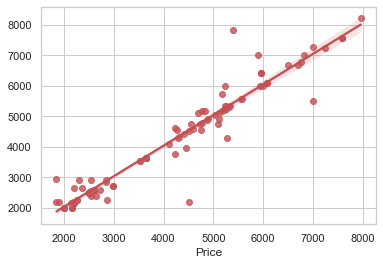

In [64]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="r")
plt.show()

# Random Forest Regressor

R2_Score: 95.51053991731308
Mean Absolute Error: 214.73102803738314
Mean Squared Error: 113536.79075514019
Root Mean Squared Error: 336.9522084141016

Cross Validation Score: 37.91294785198885

R2 Score - Cross Validation Score is 57.597592065324235


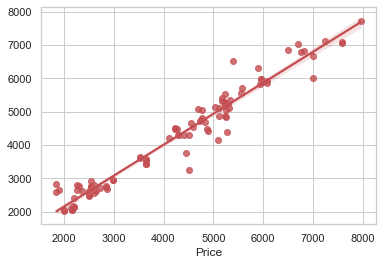

In [65]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="r")
plt.show()

# Extra Trees Regressor

R2_Score: 91.61521781506335
Mean Absolute Error: 249.40953271028036
Mean Squared Error: 212048.05097383173
Root Mean Squared Error: 460.48675439564136

Cross Validation Score: 37.70072460570435

R2 Score - Cross Validation Score is 53.914493209358994


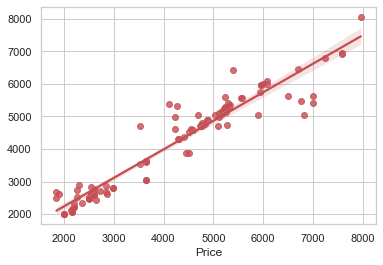

In [66]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="r")
plt.show()

# GradientBoosting Regressor

R2_Score: 92.76640499654039
Mean Absolute Error: 295.78730605306777
Mean Squared Error: 182934.95146162188
Root Mean Squared Error: 427.70895648983304

Cross Validation Score: 52.947823166076006

R2 Score - Cross Validation Score is 39.81858183046438


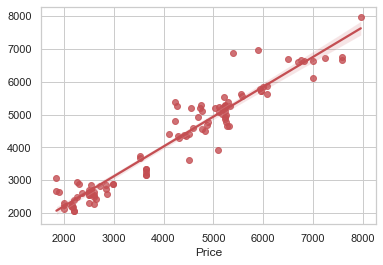

In [67]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="r")
plt.show()

# Extreme Gradient Boosting Regressor (XGB)

R2_Score: 93.3120912987236
Mean Absolute Error: 217.62053245473132
Mean Squared Error: 169134.74600978015
Root Mean Squared Error: 411.2599494356096

Cross Validation Score: 43.28919836819506

R2 Score - Cross Validation Score is 50.02289293052854


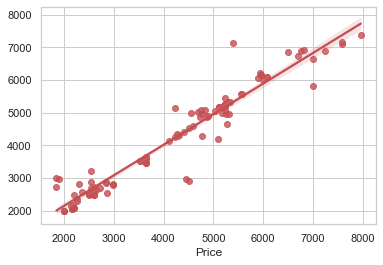

In [68]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="r")
plt.show()

# Bagging Regressor

R2_Score: 93.27254007911884
Mean Absolute Error: 280.40467289719624
Mean Squared Error: 170134.98177570093
Root Mean Squared Error: 412.4742195285675

Cross Validation Score: 35.53076655022146

R2 Score - Cross Validation Score is 57.74177352889738


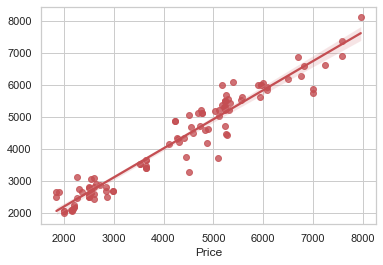

In [69]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="r")
plt.show()

# KNeighbors Regressor

R2_Score: 56.64089739948706
Mean Absolute Error: 817.8242990654206
Mean Squared Error: 1096535.7233644861
Root Mean Squared Error: 1047.1560167255336

Cross Validation Score: 8.021801598776264

R2 Score - Cross Validation Score is 48.619095800710795


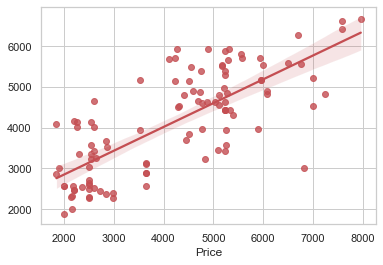

In [70]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="r")
plt.show()

All models have performed very well.From the difference between R2 score and Cross Validation score, it can be seen that the XGB Regressor has least difference and low evaluation metrics compared to other models. That is XGBoost as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [73]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [75]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 150}

R2_Score: 94.57879339447881
Mean absolute error: 198.37271374853972
Mean squared error: 137100.31689224092
Root Mean Squared error: 370.27059955151844


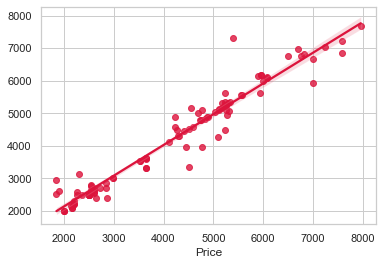

In [76]:
# Creating final model
Flight_price_model = xgb(gamma=0.1, learning_rate=0.15000000000000002, max_depth=10, n_estimators=200)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 99.76% which is very good.
From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

# Saving the Final model

In [77]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

Loading the saved model and predicting Flight price

In [78]:
# Loading the saved model
Model=joblib.load("FlightPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([5167.04  , 6679.803 , 5336.56  , 5564.9624, 4930.7295, 2853.7964,
       4283.2495, 5230.289 , 2090.1023, 4299.073 , 5094.544 , 5301.0254,
       2636.5657, 6146.59  , 5237.117 , 7674.8545, 2000.7037, 1999.1357,
       5236.8555, 2499.2715, 4831.445 , 1999.0853, 3639.9375, 2628.686 ,
       5059.376 , 5016.173 , 3947.7407, 2079.098 , 2139.0383, 2499.2402,
       6004.141 , 2706.081 , 6761.0215, 2711.7239, 6817.016 , 3529.0874,
       3135.5366, 2395.2056, 3329.5447, 4880.826 , 6168.997 , 3526.9946,
       5219.09  , 2709.1516, 5327.203 , 2498.9497, 2509.1177, 4307.023 ,
       4592.066 , 4119.112 , 2573.6313, 4496.711 , 2217.7488, 2935.0427,
       2783.5598, 6168.997 , 3022.1658, 6081.577 , 4517.0103, 4460.6914,
       2518.8071, 2498.8647, 2191.0334, 2535.7456, 2492.5466, 7026.269 ,
       3970.754 , 4893.9536, 5567.227 , 7300.548 , 3639.7673, 2775.731 ,
       5223.032 , 5041.166 , 5937.6406, 4798.632 , 4566.8135, 6858.8335,
       5234.878 , 4887.554 , 6104.6235, 2400.5583, 

In [79]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T
Predicted_Flight_Ticket_Price

Predicted  Actual
0    5167.040039  5167.0
1    6679.803223  7007.0
2    5336.560059  5342.0
3    5564.962402  5565.0
4    4930.729492  5272.0
..           ...     ...
102  2217.748779  2200.0
103  5136.726074  5109.0
104  2614.442139  1895.0
105  5103.520996  5250.0
106  3594.505615  3640.0

[107 rows x 2 columns]

Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.

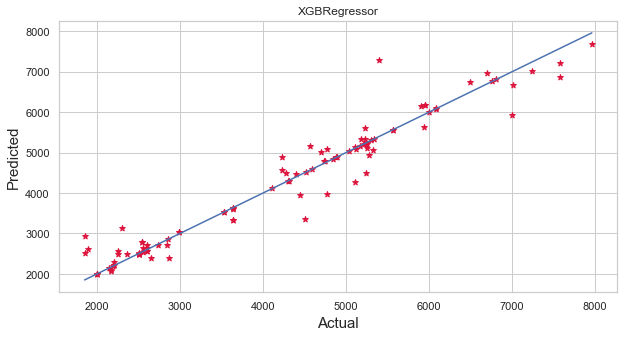

In [80]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [81]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("PredictedFlightTicketPrice.csv",index=False)

# Conclusion
In this project we have scraped the flight data from airline webpages. Then the comma separated value file is loaded into a data frame. Looking at the data set we understand that there are some features needs to be processed like converting the data types and get the actual value from the string entries from the time related columns. After the data is been processed I have done some EDA to understand the relation among features and the target variable. Features like flight duration, number of stops during the journey and the availability of meals are playing major role in predicting the prices of the flights

As we have seen, the prediction is showing a similar relationship with the actual price from the scrapped data set. This means the model predicted correctly and it could help airlines by predicting what prices they can maintain. It could also help customers to predict future flight prices and plan the journey accordingly because it is difficult for airlines to maintain prices since it changes dynamically due to different conditions. Hence by using Machine Learning techniques we can solve this problem.

The above research will help our client to study the latest flight price market and with the help of the model built he can easily predict the price ranges of the flight, and also will helps him to understand Based on what factors the fight price is decided.

